In [1]:
import sys
 
sys.path.append('C:\\Users\\Nikhil\\Developer\\Data_Science_Projects')
from common_ds_modules import missing_values, data_manipulation, modeling, eda
import os
import pandas as pd
import numpy as np
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)

from sklearn.compose import make_column_selector as selector
from scipy.stats import skew

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isna().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

May have to drop Cabin as a variable, as there are so many missing values

#### Survival Distribution

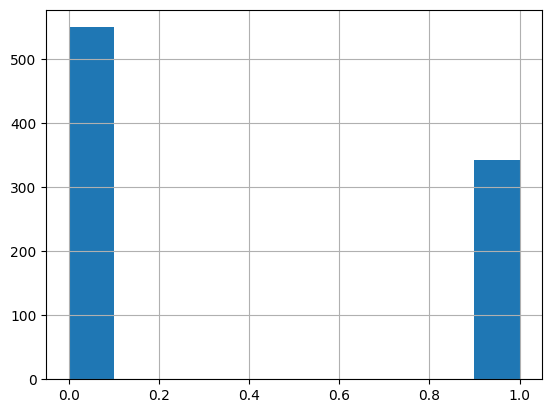

In [4]:
train['Survived'].hist()
plt.show()

In [5]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Slightly over 1/3 survive, would be interesting trying to use SMOTE to balance the population

#### PClass Distribution

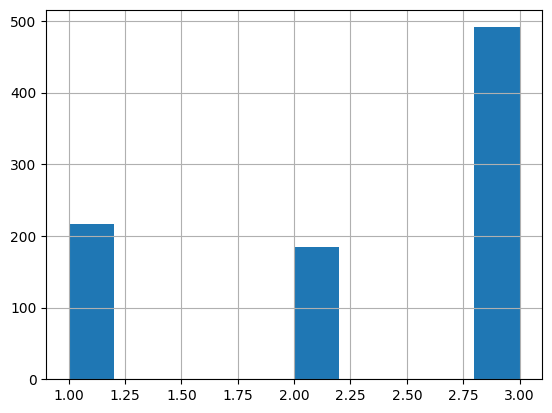

In [6]:
train['Pclass'].hist()
plt.show()

In [7]:
pclass_survivability = pd.crosstab(train['Pclass'], train['Survived'])
pclass_survivability['class_survival_rate'] = pclass_survivability[1]/(pclass_survivability[1] + pclass_survivability[0])
pclass_survivability['class_survival_rate']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: class_survival_rate, dtype: float64

### PClass Survivability

In [8]:
pclass_survivability

Survived,0,1,class_survival_rate
Pclass,,,
1,80,136,0.629630
2,97,87,0.472826
3,372,119,0.242363


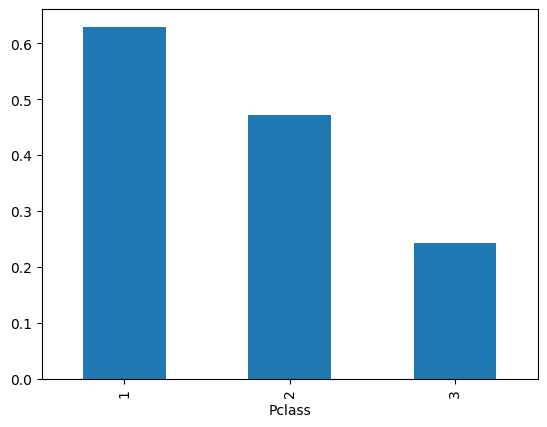

In [9]:
pclass_survivability['class_survival_rate'].plot.bar()
plt.show()

In [10]:
for name, sex in zip(train['Name'].values[:20], train['Sex'].values[:20]):
    print(f'Name: {name}, sex: {sex}')

Name: Braund, Mr. Owen Harris, sex: male
Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer), sex: female
Name: Heikkinen, Miss. Laina, sex: female
Name: Futrelle, Mrs. Jacques Heath (Lily May Peel), sex: female
Name: Allen, Mr. William Henry, sex: male
Name: Moran, Mr. James, sex: male
Name: McCarthy, Mr. Timothy J, sex: male
Name: Palsson, Master. Gosta Leonard, sex: male
Name: Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg), sex: female
Name: Nasser, Mrs. Nicholas (Adele Achem), sex: female
Name: Sandstrom, Miss. Marguerite Rut, sex: female
Name: Bonnell, Miss. Elizabeth, sex: female
Name: Saundercock, Mr. William Henry, sex: male
Name: Andersson, Mr. Anders Johan, sex: male
Name: Vestrom, Miss. Hulda Amanda Adolfina, sex: female
Name: Hewlett, Mrs. (Mary D Kingcome) , sex: female
Name: Rice, Master. Eugene, sex: male
Name: Williams, Mr. Charles Eugene, sex: male
Name: Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele), sex: female
Name: Masselmani, Mrs. Fatima, sex: fe

In [11]:
for name in zip(train['Name'].values[:20]):
    print(f'Name: {name}')

Name: ('Braund, Mr. Owen Harris',)
Name: ('Cumings, Mrs. John Bradley (Florence Briggs Thayer)',)
Name: ('Heikkinen, Miss. Laina',)
Name: ('Futrelle, Mrs. Jacques Heath (Lily May Peel)',)
Name: ('Allen, Mr. William Henry',)
Name: ('Moran, Mr. James',)
Name: ('McCarthy, Mr. Timothy J',)
Name: ('Palsson, Master. Gosta Leonard',)
Name: ('Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',)
Name: ('Nasser, Mrs. Nicholas (Adele Achem)',)
Name: ('Sandstrom, Miss. Marguerite Rut',)
Name: ('Bonnell, Miss. Elizabeth',)
Name: ('Saundercock, Mr. William Henry',)
Name: ('Andersson, Mr. Anders Johan',)
Name: ('Vestrom, Miss. Hulda Amanda Adolfina',)
Name: ('Hewlett, Mrs. (Mary D Kingcome) ',)
Name: ('Rice, Master. Eugene',)
Name: ('Williams, Mr. Charles Eugene',)
Name: ('Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',)
Name: ('Masselmani, Mrs. Fatima',)


In [12]:
def is_married(x):
    return 'mrs.' in x['Name'].lower() and x['Sex'] == 'female'

In [13]:
'(' in train['Name'].values[1].split(', ')[1] and ')' in train['Name'].values[1].split(', ')[1]

True

In [14]:
def get_title(x):
    return x.split(', ')[1].split(' ')[0]

In [15]:
def kept_maiden_name(x):
    return '(' in x['Name'].split(', ')[1] and ')' in x['Name'].split(', ')[1] and x['title'] == 'Mrs.'

In [16]:
train['is_married'] = train.apply(lambda x: is_married(x), axis='columns')

In [17]:
train['title'] = train['Name'].apply(lambda x: get_title(x))

In [18]:
train['kept_maiden_name'] = train.apply(lambda x: kept_maiden_name(x), axis='columns')

In [19]:
train[train['title'] == 'Mrs.']['kept_maiden_name'].value_counts()

kept_maiden_name
True     121
False      4
Name: count, dtype: int64

In [20]:
train['is_married'].value_counts()

is_married
False    766
True     125
Name: count, dtype: int64

In [21]:
train.shape[0] - (517 + 182 + 125 + 40)

27

In [22]:
train['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [23]:
'Lady.' in ['Mr.', 'Miss.']

False

In [24]:
def convert_title(title):
    if title not in ['Mr.', 'Miss.', 'Mrs.', 'Master']:
        return 'other'
    else:
        return title

In [25]:
train['title_converted'] = train['title'].apply(lambda x: convert_title(x) )

### Title Survivability

In [26]:
train['title_converted'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'other'], dtype=object)

In [282]:
title_survivability = pd.crosstab(train['title_converted'], train['Survived'])
title_survivability['class_survival_rate'] = title_survivability[1]/(title_survivability[1] + title_survivability[0])
title_survivability['class_survival_rate']

title_converted
Miss.    0.697802
Mr.      0.156673
Mrs.     0.792000
other    0.522388
Name: class_survival_rate, dtype: float64

### Survival Rate vs Sex

In [283]:
train['sex_converted'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [284]:
sex_survivability = pd.crosstab(train['sex_converted'], train['Survived'])
sex_survivability['sex_survival_rate'] = sex_survivability[1]/(sex_survivability[1] + sex_survivability[0])
sex_survivability

Survived,0,1,sex_survival_rate
sex_converted,,,
0,81,233,0.742038
1,468,109,0.188908


### Age Survivability

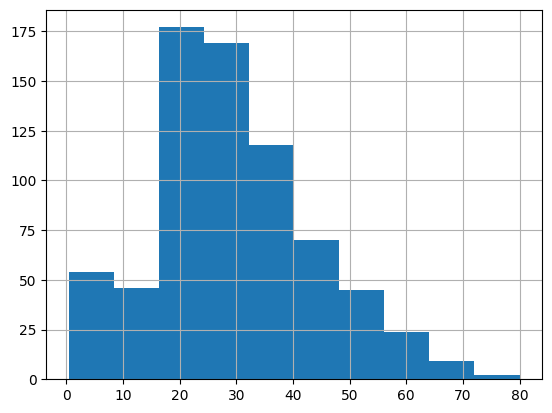

In [30]:
train['Age'].hist()
plt.show()

In [285]:
train['age_group'] = pd.cut(train['Age'], [0,18,29,45,60,1000], labels=[0, 1, 2, 3, 4])

In [286]:
age_group_survivability = pd.crosstab(train['age_group'], train['Survived'])
age_group_survivability['age_group_survival_rate'] = age_group_survivability[1]/(age_group_survivability[1] + age_group_survivability[0])
age_group_survivability

Survived,0,1,age_group_survival_rate
age_group,,,
0,69,70,0.503597
1,159,86,0.351020
2,131,96,0.422907
3,48,33,0.407407
4,17,5,0.227273


In [ ]:
0-29 Survivability: 70%
30+ survivability: 40%

In [289]:
70+86/(70+86+69+159)

70.22395833333333

In [35]:
(96 + 33 + 5)/(131 + 48 + 17 + 96 + 33 + 5)

0.40606060606060607

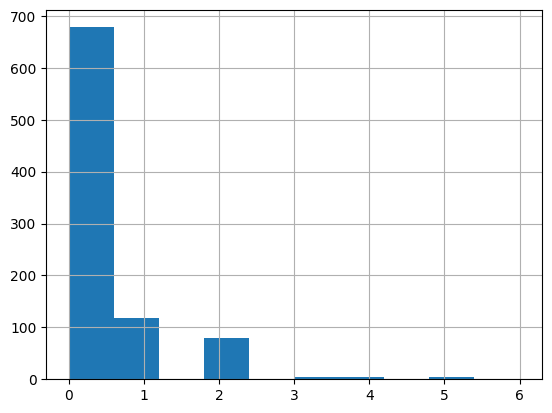

In [36]:
train['Parch'].hist()
plt.show()

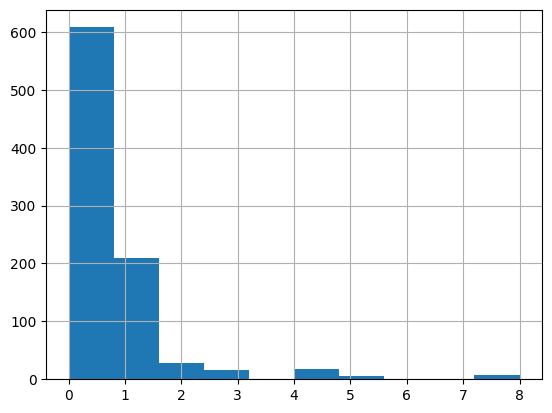

In [37]:
train['SibSp'].hist()
plt.show()

In [258]:
train['family_size'] = train['Parch'] + train['SibSp'] + 1 # to include yourself

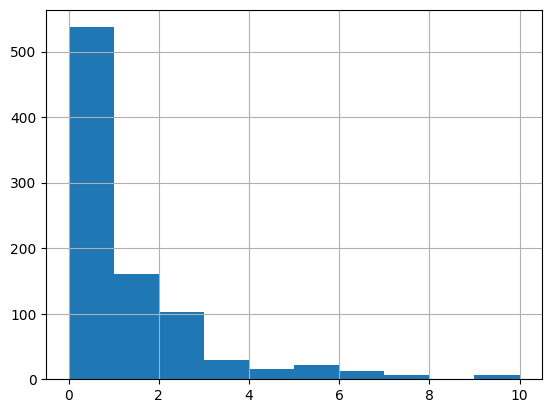

In [39]:
train['family_size'].hist()
plt.show()

In [291]:
train['solo_traveler'] = train['family_size'].apply(lambda x: 1 if x == 1 else 0)
train['solo_traveler'].value_counts()


solo_traveler
1    537
0    354
Name: count, dtype: int64

In [292]:
solo_survivability = pd.crosstab(train['solo_traveler'], train['Survived'])
solo_survivability['solo_survival_rate'] = solo_survivability[1]/(solo_survivability[1] + solo_survivability[0])
solo_survivability

Survived,0,1,solo_survival_rate
solo_traveler,,,
0,175,179,0.505650
1,374,163,0.303538


Traveling solo, drastically increases survival rate, you don't have anyone else to look after

In [42]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler'],
      dtype='object')

Assuming ticket prefixes don't matter

### Fare Survivability

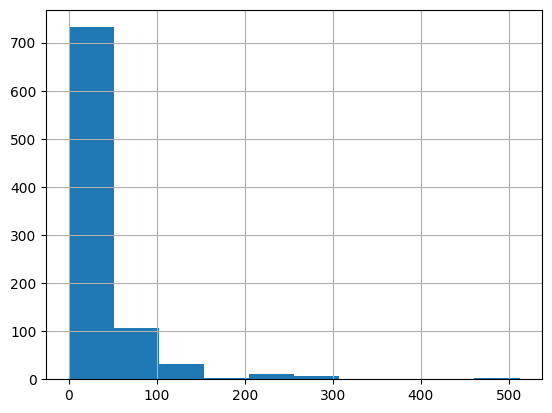

In [308]:
train['Fare'].hist()
plt.show()

In [309]:
train[train['Fare'] == 0].shape[0]

15

In [310]:
train['fare_group'], fare_bins = pd.qcut(train['Fare'], 5, labels=[0, 1, 2, 3, 4], retbins=True)

In [311]:
fare_group_survivability = pd.crosstab(train['fare_group'], train['Survived'])
fare_group_survivability['fare_group_survival_rate'] = fare_group_survivability[1]/(fare_group_survivability[1] + fare_group_survivability[0])
fare_group_survivability

Survived,0,1,fare_group_survival_rate
fare_group,,,
0,140,39,0.217877
1,147,37,0.201087
2,99,73,0.424419
3,100,80,0.444444
4,63,113,0.642045


In [312]:
fare_bins

array([  0.    ,   7.8542,  10.5   ,  21.6792,  39.6875, 512.3292])

### Embarked Survivability

In [313]:
embarked_survivability = pd.crosstab(train['Embarked'], train['Survived'])
embarked_survivability['embarked_survival_rate'] = embarked_survivability[1]/(embarked_survivability[1] + embarked_survivability[0])
embarked_survivability

Survived,0,1,embarked_survival_rate
Embarked,,,
C,75,93,0.553571
Q,47,30,0.389610
S,427,217,0.336957


In [314]:
def get_cabin(row):
    if pd.isnull(row):
        return None
    else:
        return row[0]

Not enough information to do anything with this

### Processing Cabin

In [315]:
train['cabin_prefix'] = train['Cabin'].apply(lambda x: get_cabin(x))
train['cabin_prefix'].value_counts()

cabin_prefix
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [316]:
train.groupby('cabin_prefix')['Fare'].mean().sort_values()

cabin_prefix
G     13.581250
F     18.696792
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [317]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
              ..
C32            1
C99            1
C91            1
B94            1
C148           1
Name: count, Length: 147, dtype: int64

### Processing Ticket

Getting ticket prefix

In [322]:
train['ticket_prefix'] = train['Ticket'].apply(lambda x: x.split(' ')[0] if ' ' in x else 'NONE')

In [318]:
def get_ticket_info(row):
    has_code = False
    for i in row:
        if i.isalpha():
            has_code = True
    return has_code
        

In [323]:
train['ticket_code'] = train['Ticket'].apply(lambda row: get_ticket_info(row))

In [326]:
train['ticket_code'].value_counts()

ticket_code
False    661
True     230
Name: count, dtype: int64

All ticket prefixes

In [327]:
train[train['ticket_code'] == True]['ticket_prefix'].unique()

array(['A/5', 'PC', 'STON/O2.', 'PP', 'A/5.', 'C.A.', 'A./5.', 'SC/Paris',
       'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.',
       'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

There are multiple passengers with the same ticket number

In [328]:
train[train['ticket_code'] == False]['Ticket'].value_counts()

Ticket
1601       7
347082     7
3101295    6
347088     6
382652     5
          ..
3101267    1
11765      1
14313      1
2626       1
370376     1
Name: count, Length: 514, dtype: int64

Really isn't too big of a difference between ticket prefix and Fare

In [329]:
ticket_code_present = train[train['ticket_code'] == True]
ticket_code_present.groupby('ticket_prefix')['Fare'].mean().sort_values()

ticket_prefix
LINE            0.000000
SOTON/O.Q.      7.300000
Fa              7.312500
SOTON/O2        7.525000
A/5             7.650000
A/4.            7.700000
STON/O          7.725000
SOTON/OQ        7.792857
S.C./A.4.       8.050000
A./5.           8.050000
A.5.            8.050000
A4.             8.050000
A/S             8.050000
S.P.            8.158300
S.O./P.P.       9.516667
C              10.123340
SO/C           10.500000
S.W./PP        10.500000
W/C            10.500000
C.A./SOTON     10.500000
SW/PP          10.500000
STON/O2.       10.566667
SC             12.000000
A/5.           12.147614
SCO/W          12.275000
S.O.P.         12.525000
PP             14.250000
SC/PARIS       17.107480
C.A.           18.327778
A/4            18.783333
SC/AH          21.930567
F.C.C.         22.050000
W./C.          23.661111
P/PP           24.000000
SC/Paris       34.403150
S.C./PARIS     37.004200
CA             46.900000
F.C.           52.000000
W.E.P.         61.175000
CA.        

In [71]:
ticket_code_present['ticket_prefix'].value_counts()

ticket_prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [72]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'PC']['Fare'].describe()

count     60.000000
mean     122.080483
std      114.189525
min       25.925000
25%       49.504200
50%       79.200000
75%      148.256225
max      512.329200
Name: Fare, dtype: float64

In [73]:
ticket_code_present['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
10             PP 9549
12           A/5. 2151
30            PC 17601
31            PC 17569
33          C.A. 24579
34            PC 17604
37          A./5. 2152
43       SC/Paris 2123
45     S.C./A.4. 23567
51          A/4. 39886
52            PC 17572
56          C.A. 31026
58          C.A. 34651
59             CA 2144
64            PC 17605
66          C.A. 29395
67           S.P. 3464
Name: Ticket, dtype: object

In [74]:
x = 'A/5 21171'
x.split()[1][0:2]

'21'

In [75]:
def get_ticket_sub_prefix(ticket):
    if ' ' in ticket:
        return ticket.split(' ')[1][0:2]
    else:
        return ticket


In [76]:
ticket_code_present['ticket_sub_prefix'] = ticket_code_present['Ticket'].apply(lambda x: get_ticket_sub_prefix(x))

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_32184\326430396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticket_code_present['ticket_sub_prefix'] = ticket_code_present['Ticket'].apply(lambda x: get_ticket_sub_prefix(x))


In [77]:
ticket_code_present['ticket_sub_prefix'].value_counts()

ticket_sub_prefix
17      63
21      21
31      20
2.      12
23      11
14       9
39       9
33       9
34       7
66       7
13       6
29       4
LINE     4
57       3
24       3
20       3
26       3
35       3
75       3
70       3
3        2
48       2
28       2
18       2
37       2
95       2
11       2
10       1
15       1
30       1
43       1
Ba       1
45       1
62       1
40       1
85       1
32       1
12       1
54       1
55       1
Name: count, dtype: int64

In [78]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'PC']['Ticket'].head(50)

1      PC 17599
30     PC 17601
31     PC 17569
34     PC 17604
52     PC 17572
64     PC 17605
96     PC 17754
97     PC 17759
118    PC 17558
139    PC 17593
155    PC 17597
168    PC 17318
177    PC 17595
194    PC 17610
195    PC 17569
256    PC 17585
258    PC 17755
268    PC 17582
269    PC 17760
273    PC 17596
295    PC 17612
299    PC 17558
307    PC 17758
309    PC 17485
311    PC 17608
325    PC 17760
332    PC 17582
334    PC 17611
369    PC 17477
373    PC 17760
375    PC 17604
380    PC 17757
493    PC 17609
505    PC 17758
512    PC 17473
513    PC 17603
527    PC 17483
537    PC 17761
544    PC 17761
557    PC 17757
572    PC 17474
599    PC 17485
609    PC 17582
641    PC 17477
645    PC 17572
660    PC 17611
679    PC 17755
681    PC 17572
700    PC 17757
701    PC 17475
Name: Ticket, dtype: object

In [79]:
ticket_code_present.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code', 'ticket_sub_prefix'],
      dtype='object')

In [80]:
ticket_code_present['ticket_prefix'].value_counts()

ticket_prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [81]:
for pre in ticket_code_present['ticket_prefix'].unique():
    if len(ticket_code_present[ticket_code_present['ticket_prefix'] == pre]['ticket_sub_prefix'].unique()) > 1:
        print(f'{pre} has more than 1')
    

A/5 has more than 1
PP has more than 1
A/5. has more than 1
C.A. has more than 1
A./5. has more than 1
A/4. has more than 1
W./C. has more than 1
SOTON/OQ has more than 1
C has more than 1
SOTON/O.Q. has more than 1
A.5. has more than 1
SC/AH has more than 1
A/4 has more than 1
S.O./P.P. has more than 1


In [82]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'A/5']['ticket_sub_prefix'].unique()

array(['21', '35', '24', '28', '39'], dtype=object)

In [83]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'A/5.']['ticket_sub_prefix'].unique()

array(['21', '33', '85', '10', '13'], dtype=object)

In [84]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'C.A.']['Ticket'].head(10)

33     C.A. 24579
56     C.A. 31026
58     C.A. 34651
66     C.A. 29395
70     C.A. 33111
93      C.A. 2315
134    C.A. 29178
145    C.A. 33112
161    C.A. 33595
234    C.A. 29566
Name: Ticket, dtype: object

In [85]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code'],
      dtype='object')

In [86]:
#train['ticket_code'].unique()
train[train['ticket_code'] == True]['ticket_prefix'].unique()

array(['A/5', 'PC', 'STON/O2.', 'PP', 'A/5.', 'C.A.', 'A./5.', 'SC/Paris',
       'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.',
       'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

replace . and / with nothing

In [87]:
train[train['ticket_code'] == True]['ticket_prefix'].value_counts()

ticket_prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [88]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [89]:
train[train['ticket_code'] == True]['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
10              PP 9549
12            A/5. 2151
             ...       
867            PC 17590
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 230, dtype: object

In [90]:
train['ticket_prefix_cleaned'] = train.apply(lambda row: row['ticket_prefix']\
                                      .replace('.', '').replace('/', '') if row['ticket_code'] else row['ticket_prefix'], axis='columns')

In [91]:
train[train['Ticket'] == 'LINE'][['PassengerId', 'Pclass', 'Name', 'Age', 'family_size', 'Fare', 'Embarked']]

,PassengerId,Pclass,Name,Age,family_size,Fare,Embarked
179,180,3,"Leonard, Mr. Lionel",36.0,0,0.0,S
271,272,3,"Tornquist, Mr. William Henry",25.0,0,0.0,S
302,303,3,"Johnson, Mr. William Cahoone Jr",19.0,0,0.0,S
597,598,3,"Johnson, Mr. Alfred",49.0,0,0.0,S


In [92]:
train[train['Fare'] == 0][['PassengerId', 'Pclass', 'Name', 'Age', 'family_size', 'Fare', 'Embarked']]

,PassengerId,Pclass,Name,Age,family_size,Fare,Embarked
179,180,3,"Leonard, Mr. Lionel",36.0,0,0.0,S
263,264,1,"Harrison, Mr. William",40.0,0,0.0,S
271,272,3,"Tornquist, Mr. William Henry",25.0,0,0.0,S
277,278,2,"Parkes, Mr. Francis ""Frank""",NaN,0,0.0,S
302,303,3,"Johnson, Mr. William Cahoone Jr",19.0,0,0.0,S
413,414,2,"Cunningham, Mr. Alfred Fleming",NaN,0,0.0,S
466,467,2,"Campbell, Mr. William",NaN,0,0.0,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",NaN,0,0.0,S
597,598,3,"Johnson, Mr. Alfred",49.0,0,0.0,S
633,634,1,"Parr, Mr. William Henry Marsh",NaN,0,0.0,S


In [93]:
### Duplicate ticket counts plot

<Axes: >

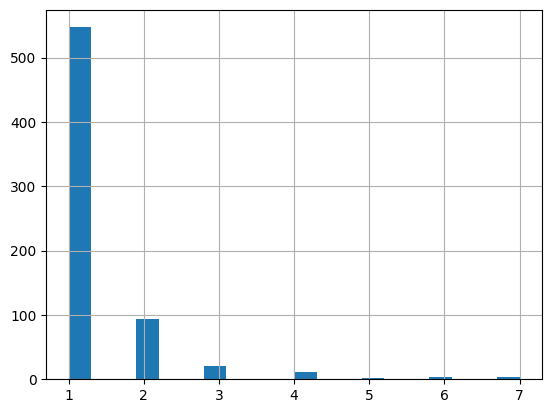

In [94]:
ticket_counts = train['Ticket'].value_counts().reset_index()
ticket_counts['count'].hist(bins=20)

In [95]:
train.groupby('Ticket')['Ticket'].count().sort_values(ascending=False)

Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
345572      1
345364      1
343276      1
343275      1
347464      1
Name: Ticket, Length: 681, dtype: int64

In [96]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code',
       'ticket_prefix_cleaned'],
      dtype='object')

Ticket reveals groupings, family

In [97]:
train[train['Ticket'] == '1601'][['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'family_size','Ticket', 'Fare', 'Cabin', 'Embarked']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,family_size,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,0,1601,56.4958,NaN,S


In [98]:
train[train['Ticket'] == '347082'][['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'family_size','Ticket', 'Fare', 'Cabin', 'Embarked']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,family_size,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,6,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,6,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,6,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,6,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,6,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,6,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,6,347082,31.275,NaN,S


In [99]:
train['Ticket'] = train['Ticket'].replace({'LINE': 'LINE 000'})

In [100]:
train['ticket_numeric'] = train['Ticket'].apply(lambda x: x.split()[1] if ' ' in x else x)

In [101]:
train['ticket_numeric_length'] = train['ticket_numeric'].apply(lambda x: len(x))
train['ticket_numeric_length'].value_counts()

ticket_numeric_length
6    423
5    247
4    165
7     32
2     12
3     10
1      2
Name: count, dtype: int64

In [102]:
train['ticket_numeric_prefix_2'] = train['ticket_numeric'].apply(lambda x: x[:2])
train['ticket_numeric_prefix_2'].unique()

array(['21', '17', '31', '11', '37', '33', '34', '23', '95', '35', '24',
       '38', '26', '19', '75', '14', '39', '29', '36', '16', '66', '57',
       '32', '41', '2.', '54', '27', '22', '85', '25', '00', '28', '45',
       '13', '43', '15', '10', '92', '72', '70', '20', '30', '18', '65',
       'Ba', '62', '40', '12', '69', '48', '84', '3', '55'], dtype=object)

In [103]:
train['ticket_numeric_prefix_3'] = train['ticket_numeric'].apply(lambda x: x[:3])
train['ticket_numeric_prefix_3'].unique()

array(['211', '175', '310', '113', '373', '330', '174', '349', '347',
       '237', '954', '215', '350', '248', '382', '244', '345', '264',
       '239', '263', '199', '176', '335', '245', '267', '265', '754',
       '116', '212', '235', '370', '143', '266', '398', '292', '269',
       '346', '214', '369', '293', '315', '331', '148', '268', '160',
       '348', '374', '364', '660', '392', '343', '573', '231', '177',
       '352', '312', '371', '110', '324', '413', '262', '2.', '545',
       '272', '173', '333', '228', '291', '213', '117', '753', '365',
       '230', '112', '851', '358', '234', '363', '111', '250', '000',
       '284', '368', '457', '354', '367', '135', '243', '118', '142',
       '220', '434', '751', '236', '295', '319', '286', '158', '362',
       '384', '172', '336', '104', '198', '119', '216', '923', '226',
       '246', '338', '290', '169', '285', '759', '229', '314', '386',
       '376', '726', '707', '323', '278', '240', '341', '394', '282',
       '130', '342', 

In [104]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_prefix_2'].unique()

array(['17'], dtype=object)

In [105]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_prefix_3'].unique()

array(['175', '176', '177', '173', '174'], dtype=object)

In [106]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_prefix_3'].value_counts()

ticket_numeric_prefix_3
175    19
177    17
176    13
174    10
173     1
Name: count, dtype: int64

In [107]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_prefix_2'].value_counts()

ticket_numeric_prefix_2
17    60
Name: count, dtype: int64

In [108]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_length'].unique()

array([5], dtype=int64)

In [109]:
train[train['ticket_prefix_cleaned'] == 'CA']['ticket_numeric_prefix_2'].unique()

array(['24', '31', '34', '21', '29', '33', '23', '17', '26', '37', '18',
       '62', '55'], dtype=object)

In [110]:
train[train['ticket_prefix_cleaned'] == 'CA']['ticket_numeric_prefix_2'].value_counts()

ticket_numeric_prefix_2
23    10
21     6
31     4
34     4
33     4
29     3
24     2
26     2
37     2
17     1
18     1
62     1
55     1
Name: count, dtype: int64

In [111]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code', 'ticket_prefix_cleaned',
       'ticket_numeric', 'ticket_numeric_length', 'ticket_numeric_prefix_2',
       'ticket_numeric_prefix_3'],
      dtype='object')

In [113]:
train['ticket_code'].unique()

array([ True, False])

In [114]:
train['ticket_group'] = train.apply(lambda row: row['ticket_prefix_cleaned'] + ' ' + row['ticket_numeric_prefix_2'] if row['ticket_code'] else None, axis='columns')

In [115]:
no_ticket_groups = train[pd.isnull(train['ticket_group'])]
no_ticket_groups.shape[0]

661

In [116]:
no_ticket_groups['Cabin'].isna().sum()

511

In [117]:
no_ticket_groups['ticket_numeric_prefix_2'].value_counts()

ticket_numeric_prefix_2
34    132
11     88
26     60
36     46
31     37
23     36
24     29
35     27
37     25
33     16
19     16
29     14
25     14
17     13
28     12
13     11
38     10
16     10
22      9
41      9
75      8
39      5
27      4
14      4
21      4
65      4
12      4
32      3
69      2
54      2
84      2
45      1
92      1
72      1
20      1
57      1
Name: count, dtype: int64

In [118]:
no_ticket_groups[no_ticket_groups['ticket_numeric_prefix_2'] == '34']['Ticket']

7      349909
8      347742
13     347082
18     345763
24     349909
        ...  
870    349248
873    345765
877    349212
878    349217
881    349257
Name: Ticket, Length: 132, dtype: object

In [119]:
no_ticket_groups[no_ticket_groups['ticket_numeric_prefix_2'] == '34']['ticket_numeric_prefix_3'].value_counts()

ticket_numeric_prefix_3
349    53
347    48
345    19
343     4
348     3
341     2
342     2
346     1
Name: count, dtype: int64

In [120]:
train['ticket_prefix'].unique()

array(['A/5', 'PC', 'STON/O2.', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', 'PP', '113783', 'A/5.', '347082',
       '350406', '248706', '382652', '244373', '345763', '2649', '239865',
       '248698', '330923', '113788', '347077', '2631', '19950', '330959',
       '349216', '335677', 'C.A.', '113789', '2677', 'A./5.', '345764',
       '2651', '7546', '11668', '349253', 'SC/Paris', '330958',
       'S.C./A.4.', '370371', '14311', '2662', '349237', '3101295',
       'A/4.', '2926', '113509', '19947', '2697', 'CA', '2669', '113572',
       '36973', '347088', '2661', 'S.P.', '3101281', '315151', 'S.O.C.',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C', '3101278', 'W./C.',
       'SOTON/OQ', '343275', '343276', '347466', 'W.E.P.', '364500',
       '374910', '231919', '244367', '349245', '349215', '35281', '7540',
       '3101276', '349207', '343120', '312991', '349249', '371110',

In [121]:
train['ticket_numeric_prefix_3'] = train['ticket_numeric'].apply(lambda x: x[:3])
train['ticket_numeric_prefix_3'].unique()

array(['211', '175', '310', '113', '373', '330', '174', '349', '347',
       '237', '954', '215', '350', '248', '382', '244', '345', '264',
       '239', '263', '199', '176', '335', '245', '267', '265', '754',
       '116', '212', '235', '370', '143', '266', '398', '292', '269',
       '346', '214', '369', '293', '315', '331', '148', '268', '160',
       '348', '374', '364', '660', '392', '343', '573', '231', '177',
       '352', '312', '371', '110', '324', '413', '262', '2.', '545',
       '272', '173', '333', '228', '291', '213', '117', '753', '365',
       '230', '112', '851', '358', '234', '363', '111', '250', '000',
       '284', '368', '457', '354', '367', '135', '243', '118', '142',
       '220', '434', '751', '236', '295', '319', '286', '158', '362',
       '384', '172', '336', '104', '198', '119', '216', '923', '226',
       '246', '338', '290', '169', '285', '759', '229', '314', '386',
       '376', '726', '707', '323', '278', '240', '341', '394', '282',
       '130', '342', 

In [122]:
no_ticket_groups['Cabin'].value_counts()

Cabin
C23 C25 C27    4
B96 B98        4
E101           3
F2             3
C22 C26        3
              ..
C128           1
F33            1
T              1
E40            1
C148           1
Name: count, Length: 109, dtype: int64

In [123]:
no_ticket_groups.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code', 'ticket_prefix_cleaned',
       'ticket_numeric', 'ticket_numeric_length', 'ticket_numeric_prefix_2',
       'ticket_numeric_prefix_3', 'ticket_group'],
      dtype='object')

In [124]:
train['ticket_group']

0          A5 21
1          PC 17
2      STONO2 31
3           None
4           None
         ...    
886         None
887         None
888        WC 66
889         None
890         None
Name: ticket_group, Length: 891, dtype: object

In [125]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code', 'ticket_prefix_cleaned',
       'ticket_numeric', 'ticket_numeric_length', 'ticket_numeric_prefix_2',
       'ticket_numeric_prefix_3', 'ticket_group'],
      dtype='object')

In [158]:
ticket_group_sizes = pd.DataFrame(train['Ticket'].value_counts()).reset_index()
ticket_group_sizes = ticket_group_sizes.rename(columns={'count': 'ticket_group_size'})
ticket_group_sizes

,Ticket,ticket_group_size
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6
...,...,...
676,9234,1
677,19988,1
678,2693,1
679,PC 17612,1


In [161]:
train = train.merge(ticket_group_sizes, on='Ticket')

In [163]:
train['Cabin'].value_counts().head(20)

Cabin
B96 B98            4
C23 C25 C27        4
G6                 4
F2                 3
E101               3
D                  3
C22 C26            3
F33                3
B57 B59 B63 B66    2
B51 B53 B55        2
F4                 2
C92                2
B5                 2
D36                2
C126               2
C93                2
B35                2
C78                2
E44                2
B77                2
Name: count, dtype: int64

In [164]:
train['Cabin'].dtype

dtype('O')

In [169]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code', 'ticket_prefix_cleaned',
       'ticket_numeric', 'ticket_numeric_length', 'ticket_numeric_prefix_2',
       'ticket_numeric_prefix_3', 'ticket_group', 'ticket_group_size'],
      dtype='object')

In [172]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'B80', 'D33', 'D49', 'B30', 'C52', 'B28',
       'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110',
       'A14', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'B82 B84', 'F2',
       'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'A31', 'D36',
       'D48', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'B79',
       'B51 B53 B55', 'B101', 'E67', 'E68', 'B94', 'C125', 'C91', 'C99',
       'C32', 'C118', 'D7', 'D9', 'D11', 'A19', 'C46', 'B49', 'D',
       'C22 C26', 'C106', 'C70', 'C68', 'C65', 'E36', 'A20', 'C54', 'C50',
       'B57 B59 B63 B66', 'C7', 'E34', 'E40', 'B18', 'C124', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'C62 C64', 'C45', 'B96 B98', 'E10',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63',
       'B37', 'C30', 'D20', 'E25', 'D46', 'B73', 'B69', 'C95', 'B38',
       'C86', 'B39', 'B22', 'A16', 'C101', 'A10', 'B41', 'D19', 'D50',
       'A23', 'B5

In [ ]:
train['num_cabins']

In [183]:
def get_num_cabins(x):
    global errors
    if not pd.isnull(x):
        try:
            return len(x.split(' '))
        except:
            #print(f"Cabins {x}")
            errors.add(x)
    else:
        return None

In [186]:
errors = set()
train["num_cabins"] = train["Cabin"].apply(lambda x: get_num_cabins(x))

In [188]:
train["num_cabins"].value_counts()

num_cabins
1.0    180
2.0     16
3.0      6
4.0      2
Name: count, dtype: int64

In [189]:
train['family_size'].value_counts()

family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [205]:
train[train["num_cabins"] == 4][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'ticket_group_size']]

,Name,SibSp,Parch,Age,Ticket,ticket_group_size
432,"Ryerson, Miss. Emily Borie",2,2,18.0,PC 17608,2
433,"Ryerson, Miss. Susan Parker ""Suzette""",2,2,21.0,PC 17608,2


In [203]:
x = train[train["num_cabins"] == 2]
x[x['family_size'] > 1].shape[0]

8

In [207]:
train['num_cabins'].value_counts()

num_cabins
1.0    180
2.0     16
3.0      6
4.0      2
Name: count, dtype: int64

In [242]:
def describe(data, variable, quantiles):
    desc_df = pd.DataFrame(data[variable].describe()).reset_index().rename(columns={"index": "percentile"})
    extra_data = list()
    for q in quantiles:
        extra = dict()
        extra = {"percentile": f"{q*100}%", f"{variable}": data[variable].quantile(q)}
        extra_data.append(extra)
        
    extra_data_df = pd.DataFrame(extra_data)
    desc_df = pd.concat([desc_df, extra_data_df], ignore_index=True)
        
    return desc_df

In [ ]:
1 to 2 people, 2 cabins

In [231]:
x = pd.DataFrame(train[train["num_cabins"] == 2]['ticket_group_size'].describe()).reset_index()
for q in quantiles:
    x.loc[len(x.index) - 1] = ['80%', train[train["num_cabins"] == 2]['ticket_group_size'].quantile(q)]
x

,index,ticket_group_size
0,count,16.000000
1,mean,2.750000
2,std,1.341641
3,min,1.000000
4,25%,1.750000
5,50%,3.000000
6,75%,4.000000
7,80%,4.000000


In [232]:
x.loc[len(x.index) - 1] = ['85%', train[train["num_cabins"] == 2]['ticket_group_size'].quantile(0.85)] 
x

,index,ticket_group_size
0,count,16.000000
1,mean,2.750000
2,std,1.341641
3,min,1.000000
4,25%,1.750000
5,50%,3.000000
6,75%,4.000000
7,85%,4.000000


In [243]:
n_cabins = train[train["num_cabins"] == 1]
desc_df = describe(n_cabins, "ticket_group_size", [0.8, 0.85, 0.9, 0.95, 0.99])
desc_df

,percentile,ticket_group_size
0,count,180.000000
1,mean,1.727778
2,std,0.796855
3,min,1.000000
4,25%,1.000000
5,50%,2.000000
6,75%,2.000000
7,max,4.000000
8,80.0%,2.000000
9,85.0%,3.000000


In [245]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code', 'ticket_prefix_cleaned',
       'ticket_numeric', 'ticket_numeric_length', 'ticket_numeric_prefix_2',
       'ticket_numeric_prefix_3', 'ticket_group', 'ticket_group_size',
       'num_cabins'],
      dtype='object')

In [ ]:
If you are a solo traveler, with ticket_group_size more than 1, that means you just ordered teh ticket together, but you are still solo travelers

In [251]:
solo_travelers = train[train['solo_traveler'] == True]
solo_travelers[solo_travelers['ticket_group_size'] > 1][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'ticket_group_size', 'Fare']]

,Name,SibSp,Parch,Age,Ticket,ticket_group_size,Fare
38,"Fynney, Mr. Joseph J",0,0,35.0,239865,2,26.0000
39,"Gaskell, Mr. Alfred",0,0,16.0,239865,2,26.0000
56,"Lurette, Miss. Elise",0,0,58.0,PC 17569,2,146.5208
92,"Hassab, Mr. Hammad",0,0,27.0,PC 17572,3,76.7292
108,"Icard, Miss. Amelie",0,0,38.0,113572,2,80.0000
...,...,...,...,...,...,...,...
752,"Allen, Miss. Elisabeth Walton",0,0,29.0,24160,3,211.3375
771,"Greenberg, Mr. Samuel",0,0,52.0,250647,2,13.0000
772,"Ponesell, Mr. Martin",0,0,34.0,250647,2,13.0000
813,"Mack, Mrs. (Mary)",0,0,57.0,S.O./P.P. 3,2,10.5000


In [252]:
solo_travelers['ticket_group_size'].value_counts()

ticket_group_size
1    462
2     40
3     17
4      9
7      7
5      2
Name: count, dtype: int64

In [253]:
solo_travelers[solo_travelers['ticket_group_size'] == 5][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'ticket_group_size', 'Fare']]

,Name,SibSp,Parch,Age,Ticket,ticket_group_size,Fare
126,"Hood, Mr. Ambrose Jr",0,0,21.0,S.O.C. 14879,5,73.5
128,"Davies, Mr. Charles Henry",0,0,18.0,S.O.C. 14879,5,73.5


3 brothers travelling with 2 friends

In [259]:
train[train['ticket_group_size'] == 5][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'ticket_group_size', 'Fare', 'family_size']]

,Name,SibSp,Parch,Age,Ticket,ticket_group_size,Fare,family_size
30,"Rice, Master. Eugene",4,1,2.0,382652,5,29.125,6
31,"Rice, Master. Arthur",4,1,4.0,382652,5,29.125,6
32,"Rice, Master. Eric",4,1,7.0,382652,5,29.125,6
33,"Rice, Master. George Hugh",4,1,8.0,382652,5,29.125,6
34,"Rice, Mrs. William (Margaret Norton)",0,5,39.0,382652,5,29.125,6
126,"Hood, Mr. Ambrose Jr",0,0,21.0,S.O.C. 14879,5,73.500,1
127,"Hickman, Mr. Stanley George",2,0,21.0,S.O.C. 14879,5,73.500,3
128,"Davies, Mr. Charles Henry",0,0,18.0,S.O.C. 14879,5,73.500,1
129,"Hickman, Mr. Leonard Mark",2,0,24.0,S.O.C. 14879,5,73.500,3
130,"Hickman, Mr. Lewis",2,0,32.0,S.O.C. 14879,5,73.500,3


In [261]:
train['family_size'].value_counts()

family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [262]:
train[train['family_size'] == 11][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'ticket_group_size', 'Fare']]

,Name,SibSp,Parch,Age,Ticket,ticket_group_size,Fare
239,"Sage, Master. Thomas Henry",8,2,NaN,CA. 2343,7,69.55
240,"Sage, Miss. Constance Gladys",8,2,NaN,CA. 2343,7,69.55
241,"Sage, Mr. Frederick",8,2,NaN,CA. 2343,7,69.55
242,"Sage, Mr. George John Jr",8,2,NaN,CA. 2343,7,69.55
243,"Sage, Miss. Stella Anna",8,2,NaN,CA. 2343,7,69.55
244,"Sage, Mr. Douglas Bullen",8,2,NaN,CA. 2343,7,69.55
245,"Sage, Miss. Dorothy Edith ""Dolly""",8,2,NaN,CA. 2343,7,69.55


In [267]:
train[train['family_size'] == 11].shape[0]

7

In [265]:
test = pd.read_csv('test.csv')

In [266]:
x_test = test[test['Ticket'] == 'CA. 2343']
x_test[['Name', 'SibSp', 'Parch', 'Age','Ticket','Fare']]

,Name,SibSp,Parch,Age,Ticket,Fare
188,"Sage, Miss. Ada",8,2,NaN,CA. 2343,69.55
342,"Sage, Mr. John George",1,9,NaN,CA. 2343,69.55
360,"Sage, Master. William Henry",8,2,14.5,CA. 2343,69.55
365,"Sage, Mrs. John (Annie Bullen)",1,9,NaN,CA. 2343,69.55


### INSIGHT KAGGLE COMPETITION SET DATA UP POORLY

can't really use family size or ticket group size to predict survivability, train tells you which ticket groups are most likely to survive, which is cheating on the test data, since you already have that information

In [244]:
for n in [1, 2, 3, 4]:
    print(f"Ticket Group size distribution for {n} cabins")
    n_cabins = train[train["num_cabins"] == n]
    desc_df = describe(n_cabins, "ticket_group_size", [0.8, 0.85, 0.9, 0.95, 0.99])
    display(desc_df)

Ticket Group size distribution for 1 cabins


,percentile,ticket_group_size
0,count,180.000000
1,mean,1.727778
2,std,0.796855
3,min,1.000000
4,25%,1.000000
5,50%,2.000000
6,75%,2.000000
7,max,4.000000
8,80.0%,2.000000
9,85.0%,3.000000


Ticket Group size distribution for 2 cabins


,percentile,ticket_group_size
0,count,16.000000
1,mean,2.750000
2,std,1.341641
3,min,1.000000
4,25%,1.750000
5,50%,3.000000
6,75%,4.000000
7,max,4.000000
8,80.0%,4.000000
9,85.0%,4.000000


Ticket Group size distribution for 3 cabins


,percentile,ticket_group_size
0,count,6.000000
1,mean,3.333333
2,std,1.211060
3,min,1.000000
4,25%,3.250000
5,50%,4.000000
6,75%,4.000000
7,max,4.000000
8,80.0%,4.000000
9,85.0%,4.000000


Ticket Group size distribution for 4 cabins


,percentile,ticket_group_size
0,count,2.0
1,mean,2.0
2,std,0.0
3,min,2.0
4,25%,2.0
5,50%,2.0
6,75%,2.0
7,max,2.0
8,80.0%,2.0
9,85.0%,2.0


In [269]:
train[train['num_cabins'] == 2]['family_size'].describe()

count    16.000000
mean      2.687500
std       1.302242
min       1.000000
25%       1.750000
50%       2.500000
75%       4.000000
max       4.000000
Name: family_size, dtype: float64

In [270]:
train[train['num_cabins'] == 3]['family_size'].describe()

count    6.000000
mean     4.500000
std      2.345208
min      1.000000
25%      3.000000
50%      6.000000
75%      6.000000
max      6.000000
Name: family_size, dtype: float64

In [271]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'B80', 'D33', 'D49', 'B30', 'C52', 'B28',
       'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110',
       'A14', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'B82 B84', 'F2',
       'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'A31', 'D36',
       'D48', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'B79',
       'B51 B53 B55', 'B101', 'E67', 'E68', 'B94', 'C125', 'C91', 'C99',
       'C32', 'C118', 'D7', 'D9', 'D11', 'A19', 'C46', 'B49', 'D',
       'C22 C26', 'C106', 'C70', 'C68', 'C65', 'E36', 'A20', 'C54', 'C50',
       'B57 B59 B63 B66', 'C7', 'E34', 'E40', 'B18', 'C124', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'C62 C64', 'C45', 'B96 B98', 'E10',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63',
       'B37', 'C30', 'D20', 'E25', 'D46', 'B73', 'B69', 'C95', 'B38',
       'C86', 'B39', 'B22', 'A16', 'C101', 'A10', 'B41', 'D19', 'D50',
       'A23', 'B5

In [274]:
train["num_cabins"].unique()

array([nan,  1.,  3.,  2.,  4.])

### Filling in number of cabins

In [276]:
def get_num_cabins(row):
    if not pd.isnull(row['num_cabins']):
        return row["num_cabins"]
    else:
        if row["ticket_group_size"] <= 2:
            return 1
        elif row["ticket_group_size"] > 2 and row["ticket_group_size"] < 5 and row["family_size"] <= 4: 
            return 2
        elif row["ticket_group_size"] > 2 and row["ticket_group_size"] < 5 and row["family_size"] >= 5:
            return 3
        else:
            return 4

In [277]:
train["num_cabins"] = train.apply(lambda row: get_num_cabins(row), axis='columns')

In [278]:
train["num_cabins"].isna().sum()

0

<Axes: >

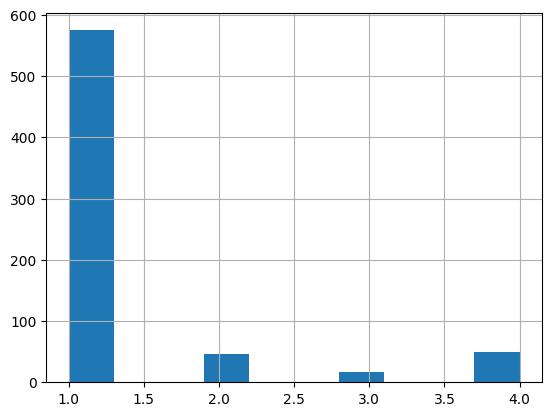

In [280]:
missing_cabins = train[pd.isnull(train["Cabin"])]
missing_cabins['num_cabins'].hist()

In [281]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_length', 'ticket_code', 'ticket_prefix_cleaned',
       'ticket_numeric', 'ticket_numeric_length', 'ticket_numeric_prefix_2',
       'ticket_numeric_prefix_3', 'ticket_group', 'ticket_group_size',
       'num_cabins'],
      dtype='object')

In [214]:
missing_cabins[missing_cabins['ticket_group_size'] > 4].shape[0]

49

In [206]:
train[train["num_cabins"] == 2]['ticket_group_size'].describe() # 2 or 3 people

count    16.000000
mean      2.750000
std       1.341641
min       1.000000
25%       1.750000
50%       3.000000
75%       4.000000
max       4.000000
Name: ticket_group_size, dtype: float64

In [204]:
train[train["num_cabins"] == 3]['family_size'].describe()

count    6.000000
mean     3.500000
std      2.345208
min      0.000000
25%      2.000000
50%      5.000000
75%      5.000000
max      5.000000
Name: family_size, dtype: float64

In [196]:
train[train["num_cabins"] == 1]['family_size'].describe()

count    180.000000
mean       0.683333
std        0.772972
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: family_size, dtype: float64

In [197]:
train[pd.isnull(train["num_cabins"])]['family_size'].describe()

count    687.000000
mean       0.912664
std        1.740765
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: family_size, dtype: float64

In [198]:
missing_cabin = train[pd.isnull(train["num_cabins"])]

In [200]:
missing_cabin[missing_cabin['family_size'] > 1].shape[0]

149

In [201]:
missing_cabin.shape

(687, 33)

In [193]:
train[train['Ticket'] == 'PC 17608']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,ticket_length,ticket_code,ticket_prefix_cleaned,ticket_numeric,ticket_numeric_length,ticket_numeric_prefix_2,ticket_numeric_prefix_3,ticket_group,ticket_group_size,num_cabins
432,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,...,PC,True,PC,17608,5,17,176,PC 17,2,4.0
433,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,...,PC,True,PC,17608,5,17,176,PC 17,2,4.0


In [185]:
errors

set()

In [171]:
train[train['Cabin'] == 'B96 B98'][['Name', 'SibSp', 'Parch', 'Age','Ticket', 'family_size']]

,Name,SibSp,Parch,Age,Ticket,family_size
503,"Carter, Mr. William Ernest",1,2,36.0,113760,3
504,"Carter, Miss. Lucile Polk",1,2,14.0,113760,3
505,"Carter, Mrs. William Ernest (Lucile Polk)",1,2,36.0,113760,3
506,"Carter, Master. William Thornton II",1,2,11.0,113760,3


In [152]:
pd.DataFrame(train.groupby('Ticket')['Ticket'].count())

,Ticket
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1
...,...
W./C. 6608,4
W./C. 6609,1
W.E.P. 5734,1


In [132]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [126]:
train[train['ticket_prefix_cleaned'] == '113803']['Ticket']

3      113803
137    113803
Name: Ticket, dtype: object

In [127]:
train['ticket_prefix_cleaned'].unique()

array(['A5', 'PC', 'STONO2', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', 'PP', '113783', '347082', '350406',
       '248706', '382652', '244373', '345763', '2649', '239865', '248698',
       '330923', '113788', '347077', '2631', '19950', '330959', '349216',
       '335677', 'CA', '113789', '2677', '345764', '2651', '7546',
       '11668', '349253', 'SCParis', '330958', 'SCA4', '370371', '14311',
       '2662', '349237', '3101295', 'A4', '2926', '113509', '19947',
       '2697', '2669', '113572', '36973', '347088', '2661', 'SP',
       '3101281', '315151', 'SOC', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059', '3101278', 'WC', 'SOTONOQ', '343275', '343276', '347466',
       'WEP', '364500', '374910', '231919', '244367', '349245', '349215',
       '35281', '7540', '3101276', '349207', '343120', '312991', '349249',
       '371110', '110465', '2665', '324669', '4136', '2627', 'STONO',
  

In [128]:
train['ticket_group'].unique()

array(['A5 21', 'PC 17', 'STONO2 31', None, 'PP 95', 'CA 24',
       'SCParis 21', 'SCA4 23', 'A4 39', 'CA 31', 'CA 34', 'CA 21',
       'CA 29', 'SP 34', 'CA 33', 'SOC 14', 'WC 66', 'SOTONOQ 39',
       'WEP 57', 'CA 23', 'STONO 2.', 'A4 54', 'C 17', 'SOTONOQ 31',
       'A5 33', 'SCPARIS 21', 'SOP 11', 'A5 11', 'A5 85', 'Fa 26',
       'LINE 00', 'A5 35', 'FCC 13', 'WC 14', 'PP 43', 'SWPP 75',
       'SCOW 15', 'CA 17', 'CA 26', 'A5 10', 'A5 24', 'PPP 33', 'CA 37',
       'C 70', 'SC 17', 'A5 13', 'A4 34', 'SCAH 30', 'CA 18', 'A5 28',
       'AS 28', 'SCAH Ba', 'A5 18', 'A4 45', 'CA 62', 'C 40', 'A4 48',
       'A4 20', 'A5 32', 'A5 39', 'SCAH 29', 'SOPP 75', 'FC 12',
       'SOTONO2 31', 'SOPP 3', 'SCPARIS 20', 'CA 55', 'CASOTON 34'],
      dtype=object)

In [129]:
train[train['ticket_prefix_cleaned'] == 'CA']['ticket_numeric_length'].unique()

array([5, 4], dtype=int64)

In [ ]:
train[train['ticket_prefix_cleaned'] == 'A5']['ticket_numeric_prefix_2'].unique()

In [ ]:
train[train['ticket_prefix_cleaned'] == 'A5']['ticket_numeric_length'].unique()

In [ ]:
train[train['ticket_prefix_cleaned'] == 'PC']['Ticket']

In [ ]:
train[train['ticket_prefix_cleaned'] == 'CA']['Ticket']

In [ ]:
train[train['ticket_prefix_cleaned'] == 'A5']['Ticket']

In [ ]:
train['ticket_prefix_cleaned'].value_counts()